# Beers, Beers, and More Beers

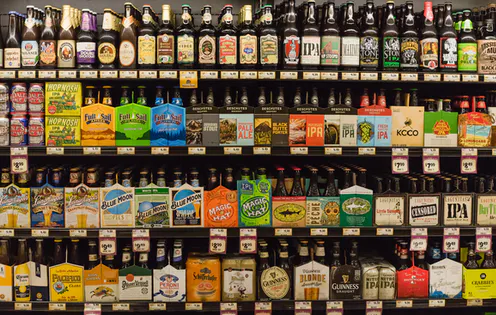

## I love drinking beer and having great conversations over a good beer. So, I thought this would be a great place to start my journey of data story telling on beers. 

Lots of information here, and it was fun to play with. I hope you enjoy. If you have any comments or concerns, please let me know!

In [ ]:
# of course, let's import the libraries we know we need
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Also, let's make sure that we can access the data easily by changing the directory. 

In [ ]:
cd "/kaggle/input/craft-cans"

In [ ]:
breweries = pd.read_csv("breweries.csv")
beers = pd.read_csv("beers.csv")

### Now, let's take a look at some of the data and what we have. We'll come back to this later .

In [ ]:
breweries.head()

In [ ]:
beers.describe()

In [ ]:
beers.head()

In [ ]:
breweries.count(), beers.count()

# Visualization

### Of course we need to check out which state has the most breweries. This will be for simple travelling purpose. 

In [ ]:
states_count_df = breweries['state'].value_counts().rename_axis('States').reset_index(name='Num Breweries')
states_count_df.head(5)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(10,5))
sns.set_theme(style="whitegrid")
fig.suptitle('Top 10 States and Bottom 10 States')

# Top 10 States
sns.barplot(ax=axes[0], x="States", y="Num Breweries", data=states_count_df.head(10))
axes[0].set_title("Brewery Enthusiasts")

# Bottom 10 States
sns.barplot(ax=axes[1], x="States", y="Num Breweries", data=states_count_df.tail(10))
axes[1].set_title("Brewery Haters")

In [ ]:
city_df = breweries['city'].value_counts().rename_axis('City').reset_index(name='Num Breweries')
city_df.head(10)

In [ ]:
sns.set_theme(style = 'darkgrid')
sns.barplot(x='City', y='Num Breweries', data=city_df.head(10))
plt.xticks(rotation=45)
plt.title('Always a Place to Drink in These Cities')

## What about taste? Let's see what kind of beers are the favorites among us beer drinkers. 

In [ ]:
top_beers = beers['style'].value_counts().rename_axis('Beers').reset_index(name='Total')
top_beers.head(10)

#### It looks like American IPA is definitely at the top, but what does this mean? Here are few graphs that should help us learn HOW MUCH peopel really like American IPAs compared to other drinks. 

In [ ]:
sns.set_theme(style = 'darkgrid')
sns.barplot(x='Beers', y='Total', data=top_beers.head(20))
plt.xticks(rotation=90)
plt.title('Top 20 Variations of Beer/Cider')

In [ ]:
top10_beers = top_beers.head(10)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = top10_beers['Beers']
totals = top10_beers['Total']
ax.pie(totals, labels = labels, autopct='%1.2f%%')
plt.title('Percent of Top 10 Beers Consumed')
plt.show()

### Yup, it appears that IPA and Ales take 8 of the top 10 spots in this data. That makes sense. It's craft beers, not Lagers or Pilsners. 

## What about the Alcohol and Bitterness? What do people tend to do?

In [ ]:
scat_data = beers.drop(['Unnamed: 0', 'id', 'name', 'brewery_id', 'ounces'], axis=1)
scat_data.dropna()
ax = sns.scatterplot(data=scat_data, x='abv', y='ibu')
ax.set_title("Alcohol vs. the Bitterness")
ax.set_xlabel("Alcohol (ABV)")
ax.set_ylabel("Bitterness (IBU)")

plt.show()

### Of course! The higher the alcohol content, the more bitter the beer is. 

In [ ]:
beers['abv'].value_counts().head(5)

In [ ]:
beers['abv'].mean(), beers['abv'].median()

In [ ]:
beers['ounces'].value_counts()

In [ ]:
print("Most Alcoholic Beer: ", beers['abv'].max() * 100, "%")
print("Least Alcoholic Beer: ", beers['abv'].min() * 100, "%")

## So, I guess what I've seen in this data is that 
- beer is drunk in either 12 or 16 ounces
- the average beer is 5.98% (median of 5.6%)
- American IPA is #1 by far
- Move to Portland to drink more beer